## Cubic Phase Gate

When running circuit containing any non-Gaussian gates, we use the Fock backend. We use argument "cutoff_dim" to tell Strawberry Fields where to limit the Fock space.

Cubic phase gate shifts $\hat{P}$ by $\gamma\hat{X}^2$ where $\gamma$ is a definable parameter but does no transform $\hat{X}$ in the phase space.

Let's set $\gamma = 2$

In [5]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [6]:
prog = sf.Program(1)

# use the fock backend and define the argument cutoff_dim
eng = sf.Engine("fock", backend_options={"cutoff_dim":10})

with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]
    
state = eng.run(prog).state

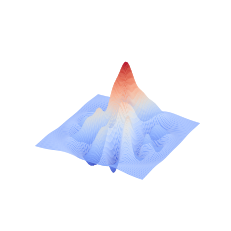

In [7]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)

X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, antialiased=True)

#fig.set_size_inches(4.8, 5)
ax.set_axis_off()

plt.savefig("cubic_phase.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)